In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()
file_path = list(uploaded.keys())[0]

Saving Waste Complaints.xlsx to Waste Complaints.xlsx


In [ ]:
df = pd.read_excel("Waste Complaints.xlsx")
df.head()

,Complaint ID,Complaint Category,Complaint
0,1,Collection Delay,The garbage collection in our area is always d...
1,2,Overflowing Bins,The bins in our neighborhood are constantly ov...
2,3,Illegal Dumping,There’s a lot of illegal dumping happening in ...
3,4,Uncleaned Area,The area around the bins is filthy. Even after...
4,5,Ineffective Recycling Programs,There’s hardly any information or proper syste...


In [ ]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Complaint ID        210 non-null    int64 
 1   Complaint Category  210 non-null    object
 2   Complaint           210 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.0+ KB
None


In [ ]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Complaint ID          0
Complaint Category    0
Complaint             0
dtype: int64


In [ ]:
print("Basic Statistics:")
print(df.describe(include='all'))

Basic Statistics:
        Complaint ID      Complaint Category  \
count     210.000000                     210   
unique           NaN                      12   
top              NaN  Environmental Concerns   
freq             NaN                      22   
mean      105.500000                     NaN   
std        60.765944                     NaN   
min         1.000000                     NaN   
25%        53.250000                     NaN   
50%       105.500000                     NaN   
75%       157.750000                     NaN   
max       210.000000                     NaN   

                                                Complaint  
count                                                 210  
unique                                                210  
top     The garbage collection in our area is always d...  
freq                                                    1  
mean                                                  NaN  
std                                          

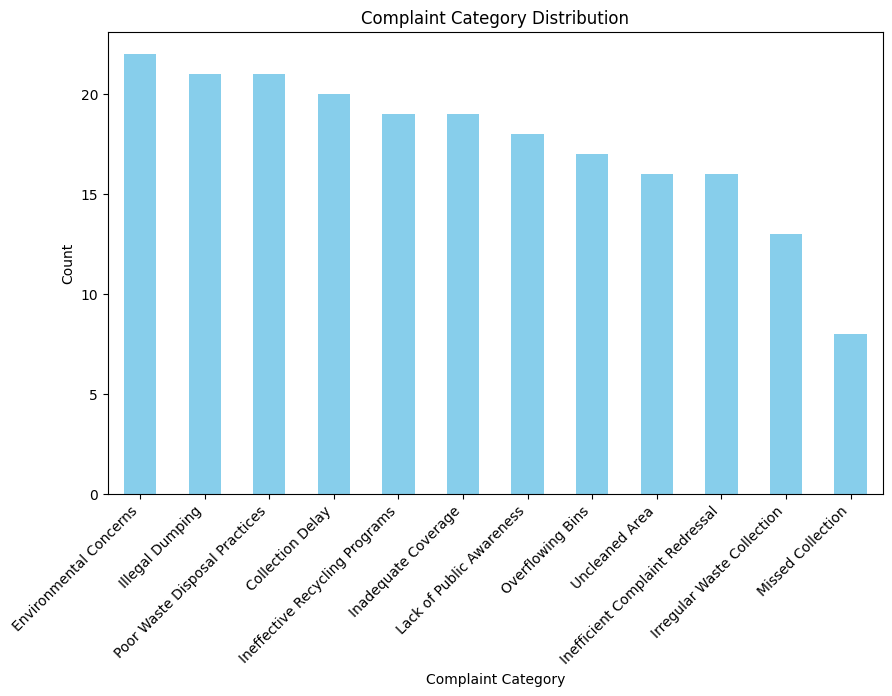

In [ ]:
if 'Complaint Category' in df.columns:
    plt.figure(figsize=(10, 6))
    df['Complaint Category'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Complaint Category Distribution')
    plt.xlabel('Complaint Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("The dataset does not have a column named 'Complaint Category'.")

In [ ]:
!pip install rasa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of aiogram to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of aiogram to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

In [ ]:
!rasa init --no-prompt

/usr/local/lib/python3.10/dist-packages/rasa/core/tracker_store.py:1044: MovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base: DeclarativeMeta = declarative_base()
(0lqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqk(B
(0x(B Rasa Open Source reports anonymous usage telemetry to help improve the product (0x(B
(0x(B for all its users.                                                             (0x(B
(0x(B                                                                                (0x(B
(0x(B If you'd like to opt-out, you can use `ra

In [ ]:
import os
import pandas as pd

df = pd.read_excel('Waste Complaints.xlsx')

nlu_file_path = "data/nlu.yml"

grouped = df.groupby("Complaint Category")['Complaint'].apply(list).to_dict()

with open(nlu_file_path, "w") as file:
    file.write("version: '3.0'\n")
    file.write("nlu:\n")
    for intent, examples in grouped.items():
        file.write(f"- intent: {intent.lower().replace(' ', '_')}\n")
        file.write("  examples: |\n")
        for example in examples:
            file.write(f"    - {example}\n")

In [ ]:
from google.colab import files

uploaded = files.upload()
file_path = list(uploaded.keys())[0]

Saving domain_copied.yml to domain_copied.yml
Saving stories.yml to stories.yml
Saving rules.yml to rules.yml
Saving nlu.yml to nlu.yml


In [ ]:
import shutil
shutil.copy("/content/stories.yml", "/content/data/stories.yml")

'/content/data/stories.yml'

In [ ]:
import shutil
shutil.copy("/content/rules.yml", "/content/data/rules.yml")

'/content/data/rules.yml'

In [ ]:
import shutil
shutil.copy("/content/domain_copied.yml", "/content/domain.yml")

'/content/domain.yml'

In [ ]:
!rasa train

/usr/local/lib/python3.10/dist-packages/rasa/core/tracker_store.py:1044: MovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base: DeclarativeMeta = declarative_base()
/usr/local/lib/python3.10/dist-packages/rasa/shared/utils/validation.py:134: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as spe

In [ ]:
!rasa shell

/usr/local/lib/python3.10/dist-packages/rasa/core/tracker_store.py:1044: MovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base: DeclarativeMeta = declarative_base()
/usr/local/lib/python3.10/dist-packages/rasa/shared/utils/validation.py:134: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as spe